## Tanzanian Water Wells

## Overview
"Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether."

## Business Problem

We are tasked with

## Data Understanding

For this analysis, we will utilize data from 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [61]:
pump_features_df = pd.read_csv('Data/water_columns.csv')
pump_features_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [62]:
pump_status_df = pd.read_csv('Data/water_status_group.csv')
pump_status_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [63]:
water_pump = pump_status_df.merge(pump_features_df, how='right')
water_pump.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [64]:
water_pump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [65]:
water_pump.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [66]:
water_pump['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [67]:
water_pump.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [68]:
water_pump.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [76]:
X = water_pump.iloc[:, :2].to_numpy()

In [77]:
y = LabelEncoder().fit_transform(water_pump['status_group'])

In [79]:
y

array([0, 0, 0, ..., 0, 0, 0])

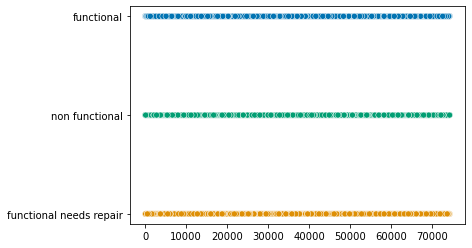

In [78]:
f, ax = plt.subplots()

sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax, hue=y, palette='colorblind')
ax.get_legend().remove()

## Data Preparation

In [10]:
#keeping feature
#will use to create water per person feature
print(water_pump['amount_tsh'].nunique())
print()
print ()
print(water_pump['amount_tsh'].value_counts())

98


0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64


In [11]:
#using to calculate new age_at_inspection column, then will drop column
print(water_pump['date_recorded'].nunique())
print()
print()
print(water_pump['date_recorded'].value_counts())


356


2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-26      1
2011-08-30      1
2004-07-01      1
2004-04-05      1
2011-09-17      1
Name: date_recorded, Length: 356, dtype: int64


In [12]:
#drop column too many unique variables to encode
print(water_pump['funder'].nunique())
print()
print()
print(water_pump['funder'].value_counts())


1897


Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Songa Hospi                  1
Ngumi                        1
Prof. Saluati                1
Hashi                        1
Ambwene Mwaikek              1
Name: funder, Length: 1897, dtype: int64


In [13]:
#lots of "0" values - we think "0" is important so we are keeping feature
print(water_pump['gps_height'].nunique())
print()
print()
print(water_pump['gps_height'].value_counts())


2428


 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64


In [14]:
#drop column too many unique variables to encode
print(water_pump['installer'].nunique())
print()
print()
print(water_pump['installer'].value_counts())


2145


DWE                17402
Government          1825
RWE                 1206
Commu               1060
DANIDA              1050
                   ...  
Ng'omango              1
MWANZA                 1
Raymond Ekura          1
LGQ                    1
JESHI LA WOKOVU        1
Name: installer, Length: 2145, dtype: int64


In [15]:
#will use to map locations then drop
print(water_pump['longitude'].nunique())
print()
print()
print(water_pump['longitude'].value_counts())


57516


0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64


In [16]:
#will use to map locations then drop
print(water_pump['latitude'].nunique())
print()
print()
print(water_pump['latitude'].value_counts())


57517


-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64


In [17]:
#keeping feature
print(water_pump['basin'].nunique())
print()
print()
print(water_pump['basin'].value_counts())

9


Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64


In [18]:
#drop column too many unique variables to encode
print(water_pump['subvillage'].nunique())
print()
print()
print(water_pump['subvillage'].value_counts())

19287


Madukani      508
Shuleni       506
Majengo       502
Kati          373
Mtakuja       262
             ... 
Inungwano       1
Kwamatuku       1
Gwangwenda      1
Libongoya       1
Musa            1
Name: subvillage, Length: 19287, dtype: int64


In [19]:
#keeping feature
print(water_pump['region'].nunique())
print()
print()
print(water_pump['region'].value_counts())

21


Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64


In [20]:
#keeping feature
print(water_pump['region_code'].nunique())
print()
print()
print(water_pump['region_code'].value_counts())

27


11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64


In [21]:
#drop column have several location features already
print(water_pump['district_code'].nunique())
print()
print()
print(water_pump['district_code'].value_counts())

20


1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64


In [22]:
#keeping feature
print(water_pump['lga'].nunique())
print()
print()
print(water_pump['lga'].value_counts())

125


Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64


In [23]:
#bin together the Urban groups
water_pump['lga'] = water_pump['lga'].replace("Moshi Urban", "Urban")
water_pump['lga'] = water_pump['lga'].replace("Kigoma Urban", "Urban")
water_pump['lga'] = water_pump['lga'].replace("Arusha Urban", "Urban")
water_pump['lga'] = water_pump['lga'].replace("Lindi Urban", "Urban")
water_pump['lga'] = water_pump['lga'].replace("Bukoba Urban", "Urban")
water_pump['lga'] = water_pump['lga'].replace("Songea Urban", "Urban")
water_pump['lga'] = water_pump['lga'].replace("Morogoro Urban", "Urban")
water_pump['lga'] = water_pump['lga'].replace("Mtwara Urban", "Urban")
print(water_pump['lga'].value_counts())

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Ilemela          142
Mafia            132
Tanga             99
Kinondoni         93
Nyamagana          1
Name: lga, Length: 118, dtype: int64


In [24]:
#drop column too many unique variables to encode
print(water_pump['ward'].nunique())
print()
print()
print(water_pump['ward'].value_counts())

2092


Igosi            307
Imalinyi         252
Siha Kati        232
Mdandu           231
Nduruma          217
                ... 
Mkumbi             1
Mlimani            1
Machinjioni        1
Kihangimahuka      1
Ifinga             1
Name: ward, Length: 2092, dtype: int64


In [25]:
#will use to calculate a new "water per person" feature then will drop
print(water_pump['population'].nunique())
print()
print()
print(water_pump['population'].value_counts())

1049


0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64


In [26]:
#replace "0" with nan.
#creating water per person feature.
# then dropping population feature
water_pump['population'].replace(to_replace=0, value=np.nan, inplace=True)
water_pump['water_per_person'] = water_pump['amount_tsh']/water_pump['population']

In [27]:
#there are a significant amount of nulls here. 
print(water_pump['public_meeting'].nunique())
print()
print()
print(water_pump['public_meeting'].value_counts())

2


True     51011
False     5055
Name: public_meeting, dtype: int64


In [28]:
#replacing nulls with a unknown bin
water_pump['public_meeting'].replace(to_replace=np.nan, value="Unknown", inplace=True)
print(water_pump['public_meeting'].value_counts())

True       51011
False       5055
Unknown     3334
Name: public_meeting, dtype: int64


In [29]:
#keeping feature, we have 3877 nulls in column.
print(water_pump['scheme_management'].nunique())
print()
print()
print(water_pump['scheme_management'].value_counts())


12


VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64


In [30]:
water_pump['scheme_management'].groupby(water_pump['status_group']).value_counts(normalize=True)

status_group             scheme_management
functional               VWC                  0.623972
                         WUG                  0.098927
                         Water Board          0.067564
                         WUA                  0.065655
                         Water authority      0.053248
                         Parastatal           0.031791
                         Private operator     0.023991
                         Company              0.017574
                         Other                0.015073
                         Trust                0.001514
                         SWC                  0.000658
                         None                 0.000033
functional needs repair  VWC                  0.570103
                         WUG                  0.164143
                         Water authority      0.109428
                         WUA                  0.058378
                         Parastatal           0.049340
                      

In [31]:
#replacing nulls and none with a unknown bin
water_pump['scheme_management'].replace(to_replace=np.nan, value="Unknown", inplace=True)
water_pump['scheme_management'] = water_pump['scheme_management'].replace("None", "Unknown")
print(water_pump['scheme_management'].value_counts())

VWC                 36793
WUG                  5206
Unknown              3878
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: scheme_management, dtype: int64


In [32]:
#drop column too many unique variables to encode
print(water_pump['scheme_name'].nunique())
print()
print()
print(water_pump['scheme_name'].value_counts())

2696


K                                  682
None                               644
Borehole                           546
Chalinze wate                      405
M                                  400
                                  ... 
Sori                                 1
Njalamatatawater gravity scheme      1
BL Siha Sec                          1
Tangawizi water Supply               1
REGWA COMPANY OF EGYPT               1
Name: scheme_name, Length: 2696, dtype: int64


In [33]:
#keeping feature, have 3056 nulls
print(water_pump['permit'].nunique())
print()
print()
print(water_pump['permit'].value_counts())

2


True     38852
False    17492
Name: permit, dtype: int64


In [34]:
#replacing nulls and none with a unknown bin
water_pump['permit'].replace(to_replace=np.nan, value="Unknown", inplace=True)
print(water_pump['permit'].value_counts())

True       38852
False      17492
Unknown     3056
Name: permit, dtype: int64


In [35]:
#lots of unknown/zero values - almost half of data
#use to calculate new feature age at inspection
#will use to calculate new boolean feature of unknown_construction_yr
print(water_pump['construction_year'].nunique())
print()
print()
print(water_pump['construction_year'].value_counts())

55


0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64


In [36]:
water_pump['construction_year'].replace(to_replace=0, value=np.nan, inplace=True)
water_pump["unknown_construction_yr"] = water_pump["construction_year"].isnull()

In [37]:
water_pump['age_at_inspection'] = water_pump['date_recorded'].str[:4].astype(int) - water_pump['construction_year'] 

In [38]:
print(water_pump['construction_year'].value_counts())

2010.0    2645
2008.0    2613
2009.0    2533
2000.0    2091
2007.0    1587
2006.0    1471
2003.0    1286
2011.0    1256
2004.0    1123
2012.0    1084
2002.0    1075
1978.0    1037
1995.0    1014
2005.0    1011
1999.0     979
1998.0     966
1990.0     954
1985.0     945
1996.0     811
1980.0     811
1984.0     779
1982.0     744
1994.0     738
1972.0     708
1974.0     676
1997.0     644
1992.0     640
1993.0     608
2001.0     540
1988.0     521
1983.0     488
1975.0     437
1986.0     434
1976.0     414
1970.0     411
1991.0     324
1989.0     316
1987.0     302
1981.0     238
1977.0     202
1979.0     192
1973.0     184
2013.0     176
1971.0     145
1960.0     102
1967.0      88
1963.0      85
1968.0      77
1969.0      59
1964.0      40
1962.0      30
1961.0      21
1965.0      19
1966.0      17
Name: construction_year, dtype: int64


In [39]:
#drop - 5 dfferent 'other' groups, two india mark groups 
#researching we find these are types of pumps  
#so drop in favor of extraction_type_group.
print(water_pump['extraction_type'].nunique())
print()
print()
print(water_pump['extraction_type'].value_counts())

18


gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64


In [40]:
#keeping feature
print(water_pump['extraction_type_group'].nunique())
print()
print()
print(water_pump['extraction_type_group'].value_counts())

13


gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64


In [41]:
#keeping feature - is more macro but losing the manufacturer breakdown
#(this could be helpful info) - so we are keeping
print(water_pump['extraction_type_class'].nunique())
print()
print()
print(water_pump['extraction_type_class'].value_counts())

7


gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64


In [42]:
#keeping but renaming other-school to school for clarity
print(water_pump['management'].nunique())
print()
print()
print(water_pump['management'].value_counts())


12


vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64


In [43]:
water_pump['management'] = water_pump['management'].replace("other - school", "school")
print(water_pump['management'].value_counts())


vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
school                 99
trust                  78
Name: management, dtype: int64


In [44]:
#keeping feature
print(water_pump['management_group'].nunique())
print()
print()
print(water_pump['management_group'].value_counts())

5


user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64


In [45]:
#keeping feature
print(water_pump['payment'].nunique())
print()
print()
print(water_pump['payment'].value_counts())


7


never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64


In [46]:
#drop - same values as payment feature
print(water_pump['payment_type'].nunique())
print()
print()
print(water_pump['payment_type'].value_counts())

7


never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64


In [47]:
#drop feature - same values as quality_group feature just grouped differently
print(water_pump['water_quality'].nunique())
print()
print()
print(water_pump['water_quality'].value_counts())

8


soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64


In [48]:
#keeping feature water_quality and quality_group are similar: 
#the quality_group just groups the salty and flouride together, soft is same as good. 
print(water_pump['quality_group'].nunique())
print()
print()
print(water_pump['quality_group'].value_counts())

6


good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64


In [49]:
#keep feature 
print(water_pump['quantity'].nunique())
print()
print()
print(water_pump['quantity'].value_counts())

5


enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64


In [50]:
#drop - same values as quantity feature
print(water_pump['quantity_group'].nunique())
print()
print()
print(water_pump['quantity_group'].value_counts())

5


enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64


In [51]:
#source and source_type are the same except source_type has a 
#NaN for unknown and groups lake/river together
print(water_pump['source'].nunique())
print()
print()
print(water_pump['source'].value_counts())

10


spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64


In [52]:
#drop, same as source feature just grouped differently
print(water_pump['source_type'].nunique())
print()
print()
print(water_pump['source_type'].value_counts())

7


spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64


In [53]:
#keep feature - same information as source feature just grouped between
#groundwater and surface.
print(water_pump['source_class'].nunique())
print()
print()
print(water_pump['source_class'].value_counts())

3


groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64


In [54]:
print(water_pump['waterpoint_type'].nunique())
print()
print()
print(water_pump['waterpoint_type'].value_counts())

7


communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64


In [55]:
#drop feature - waterpoint type does a better job of grouping 
#communal standpipes and multiple communal standpipes
print(water_pump['waterpoint_type_group'].nunique())
print()
print()
print(water_pump['waterpoint_type_group'].value_counts())

6


communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64


In [56]:
#dropping unused features
drop_cols = ["funder", "id","subvillage", "district_code", "ward", "scheme_name", "installer",
             "longitude", "latitude", "wpt_name","date_recorded", "num_private", "population",
             "extraction_type", "payment_type", "water_quality", "recorded_by",
             "quantity_group", "source_type", "waterpoint_type_group", "construction_year"]

In [57]:
water_pump.drop(drop_cols, axis=1, inplace=True)
water_pump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status_group             59400 non-null  object 
 1   amount_tsh               59400 non-null  float64
 2   gps_height               59400 non-null  int64  
 3   basin                    59400 non-null  object 
 4   region                   59400 non-null  object 
 5   region_code              59400 non-null  int64  
 6   lga                      59400 non-null  object 
 7   public_meeting           59400 non-null  object 
 8   scheme_management        59400 non-null  object 
 9   permit                   59400 non-null  object 
 10  extraction_type_group    59400 non-null  object 
 11  extraction_type_class    59400 non-null  object 
 12  management               59400 non-null  object 
 13  management_group         59400 non-null  object 
 14  payment               

In [58]:
#sanity check for nulls
water_pump.isnull().sum()

status_group                   0
amount_tsh                     0
gps_height                     0
basin                          0
region                         0
region_code                    0
lga                            0
public_meeting                 0
scheme_management              0
permit                         0
extraction_type_group          0
extraction_type_class          0
management                     0
management_group               0
payment                        0
quality_group                  0
quantity                       0
source                         0
source_class                   0
waterpoint_type                0
water_per_person           21381
unknown_construction_yr        0
age_at_inspection          20709
dtype: int64

In [59]:
#saving off new csv file for modeling notebook
water_pump.to_csv('./Data/cleaned_water_pump.csv', index=False)